# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.drop_duplicates().shape
sinasc = sinasc[['PESO', 'GESTACAO', 'SEXO', 'APGAR5']]
sinasc = sinasc[~sinasc['APGAR5'].isna()]
sinasc = sinasc[~sinasc['SEXO'].isna()]
sinasc = sinasc[~sinasc['GESTACAO'].isna()]
sinasc = sinasc[~sinasc['PESO'].isna()]

In [93]:
sinasc

,PESO,GESTACAO,SEXO,APGAR5
0,3685,37 a 41 semanas,Masculino,10.0
1,3055,37 a 41 semanas,Feminino,9.0
2,3460,37 a 41 semanas,Feminino,10.0
3,2982,37 a 41 semanas,Feminino,10.0
4,3310,37 a 41 semanas,Feminino,10.0
...,...,...,...,...
27023,2110,32 a 36 semanas,Masculino,9.0
27024,3310,37 a 41 semanas,Masculino,9.0
27025,3065,37 a 41 semanas,Masculino,10.0
27026,2352,32 a 36 semanas,Masculino,9.0


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [94]:
sinasc.loc[(sinasc['APGAR5'] >=   0) & (sinasc['APGAR5'] <=    3), 'APGAR_CLASS'] = 'asfixia_grave'
sinasc.loc[(sinasc['APGAR5'] >=   4) & (sinasc['APGAR5'] <=    5), 'APGAR_CLASS'] = 'asfixia_moderada'
sinasc.loc[(sinasc['APGAR5'] >=   6) & (sinasc['APGAR5'] <=    7), 'APGAR_CLASS'] = 'asfixia_leve'
sinasc.loc[(sinasc['APGAR5'] >=   8) & (sinasc['APGAR5'] <=   10), 'APGAR_CLASS'] = 'normal'

sinasc

,PESO,GESTACAO,SEXO,APGAR5,APGAR_CLASS
0,3685,37 a 41 semanas,Masculino,10.0,normal
1,3055,37 a 41 semanas,Feminino,9.0,normal
2,3460,37 a 41 semanas,Feminino,10.0,normal
3,2982,37 a 41 semanas,Feminino,10.0,normal
4,3310,37 a 41 semanas,Feminino,10.0,normal
...,...,...,...,...,...
27023,2110,32 a 36 semanas,Masculino,9.0,normal
27024,3310,37 a 41 semanas,Masculino,9.0,normal
27025,3065,37 a 41 semanas,Masculino,10.0,normal
27026,2352,32 a 36 semanas,Masculino,9.0,normal


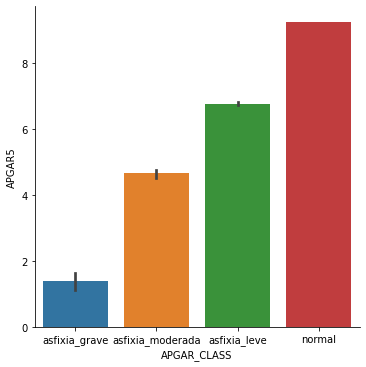

In [95]:
APGAR_CLASS_rankig = ['asfixia_grave', 'asfixia_moderada', 'asfixia_leve', 'normal']
sns.catplot(x='APGAR_CLASS'
            , y='APGAR5'
            , kind='bar'
            , data=sinasc
            , order=APGAR_CLASS_rankig
            )

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

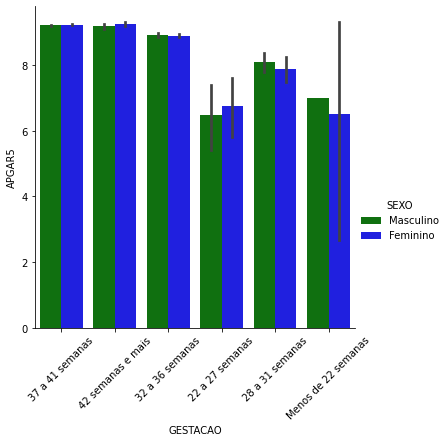

In [127]:
ax = sns.catplot(x ='GESTACAO'
                , y ='APGAR5'
                , hue = 'SEXO'
                , kind ='bar'
                , data = sinasc
                , palette=sns.color_palette(['green', 'blue']))
ax.set_xticklabels(rotation=45)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [97]:
tab_cruz = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
tab_cruz

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [98]:
tab_cruz.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2233
37 a 41 semanas        22520
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [99]:
tab_cruz_pctlin = tab_cruz.div(tab_cruz.sum(axis = 1), axis = 0)
tab_cruz_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

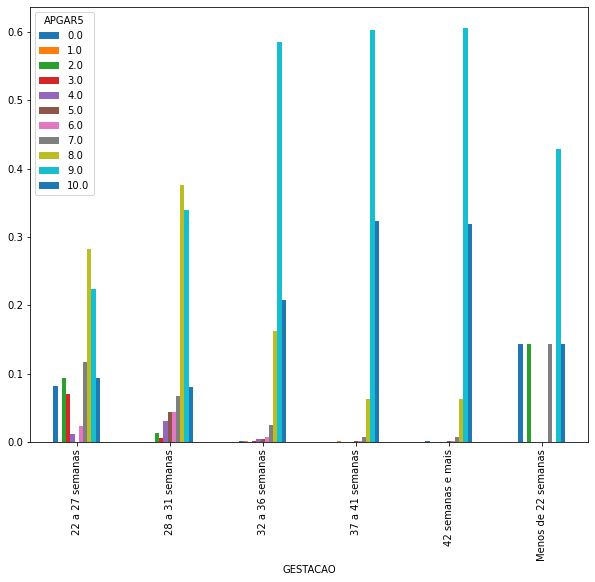

In [113]:
tab_cruz_pctlin.plot.bar()
plt.rc('figure', figsize=(10, 8))

Sim, concordo, pelas informações do gráfico, quanto mais abaixo das 37 semanas, os niveís de APGAR5, ficam bastante críticos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

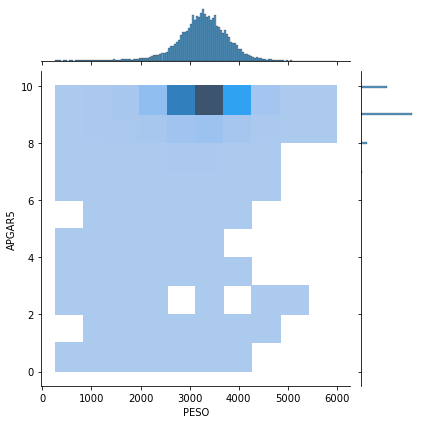

In [169]:
sns.jointplot(x = 'PESO'
              , y = 'APGAR5'
              , data = sinasc
              , kind="hist"
              , bins = [10, 10])

<AxesSubplot:xlabel='PESO', ylabel='Density'>

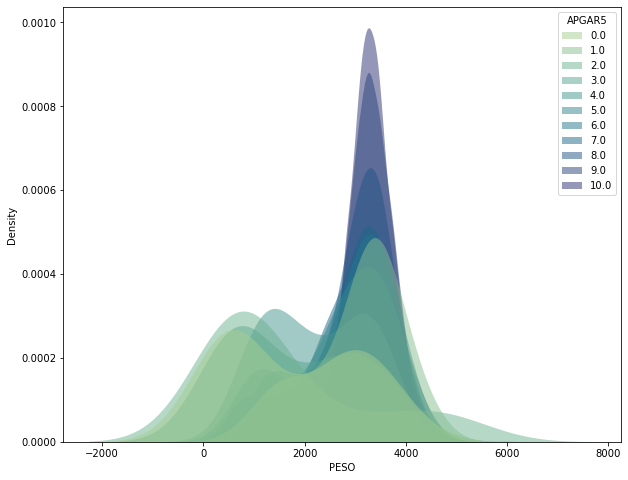

In [166]:
sns.kdeplot(
   data=sinasc, x="PESO", hue="APGAR5",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

De acordo com os gráficos, existe uma relação APGAR5 X PESO, Verifica-se quanto mais próximo ao APGAR5 normal, o peso se concentra, próximo ao considerado normal para um recem-nascido, o peso abaixo ou muito alto, observa-se um principio de piora do nivel de APGAR5